In [177]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
strs_dict = pickle.load(open('/BS/mlcysec/work/robust-segmentation/code/hrnet_seg/tblogs1024/cached_stats/strs_dict_acc_21.pkl', 'rb'))

In [178]:
all_labels = ['vegetation', 'motorcycle', 'bus', 'sidewalk', 'traffic sign', 'rider', 'wall', 'train', 'car', 'pole', 'road', 'truck', 'sky', 'person', 'fence', 'terrain', 'building', 'bicycle', 'traffic light']

def gen_heatmap(k=2, normalized=False, label=None):
    groups_dict = strs_dict[k]
    labels = []
    groups_dict = dict(sorted(groups_dict.items(), key=lambda x:x[1], reverse=True))

    g_d = {}
    for groups in groups_dict.keys():
        if label is not None:
            if label not in groups:
                continue
            g = groups.replace(','+label, '')
            g = groups.replace(label+',', '')
        else:
            g = groups
        if g.count(',') == 1: 
            group_labels = g.split(',')
            labels.extend(group_labels)
            g_d[g] = groups_dict[groups]
    if len(g_d.keys()) == 0: return
    labels = list(set(labels))
    cols, idx = labels, labels
    df = pd.DataFrame(np.zeros((len(idx), len(cols))), columns=list(reversed(cols)), index=idx).copy()
    for groups, count in g_d.items():
        if groups.count(',') == 1:
            c1, c2 = groups.split(',')
            df[c1][c2] += count
            df[c2][c1] += count
        
    #print(df)
    normalized_df = (df-df.min())/(df.max()-df.min())
    # sns.heatmap(df)
    if normalized:
        sns.heatmap(normalized_df)
    else:
        sns.heatmap(df)


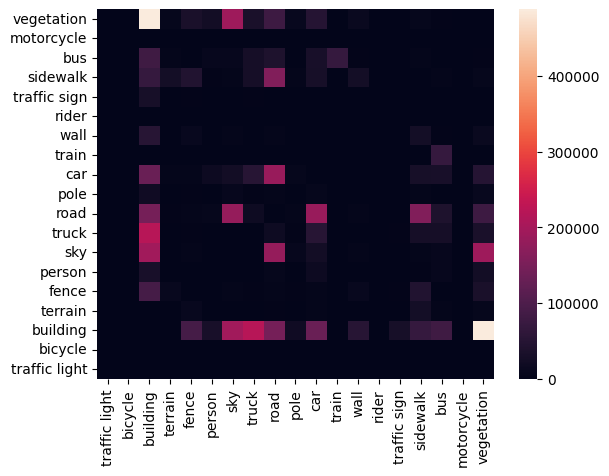

In [179]:
gen_heatmap(2, normalized=False)

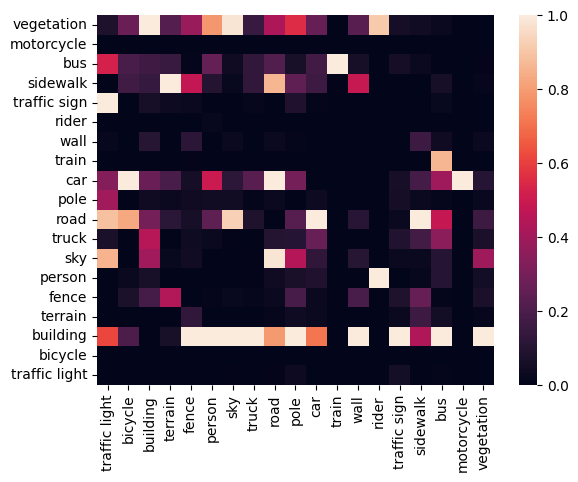

In [180]:
gen_heatmap(2, normalized=True)

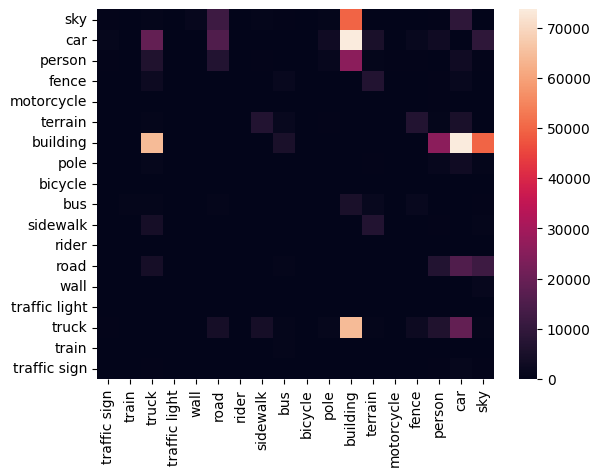

In [181]:
gen_heatmap(3, normalized=False, label='vegetation')

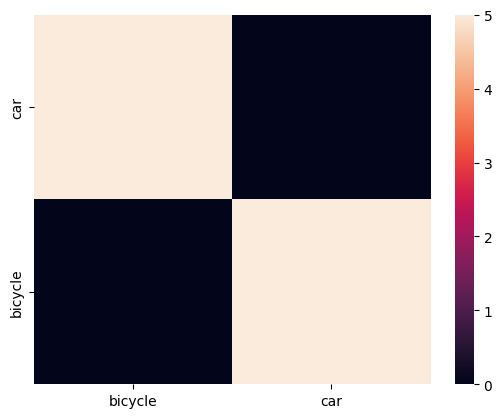

In [182]:
gen_heatmap(3, normalized=False, label='motorcycle')

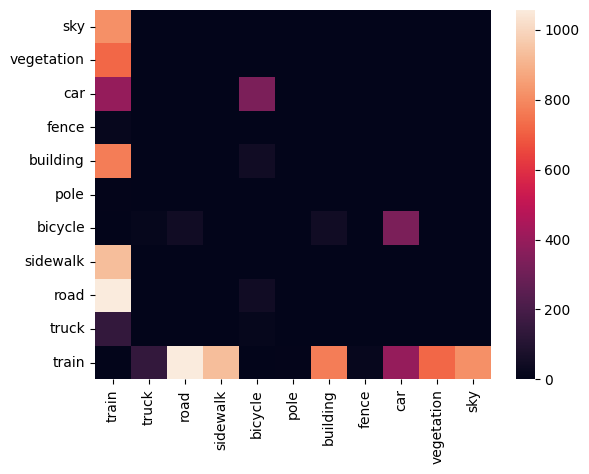

In [183]:
gen_heatmap(3, normalized=False, label='bus')

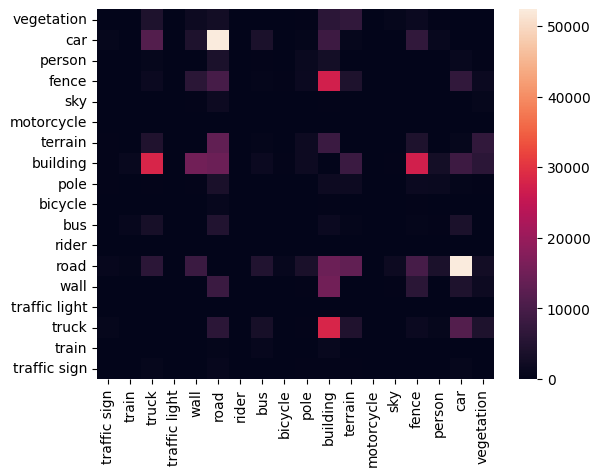

In [184]:
gen_heatmap(3, normalized=False, label='sidewalk')

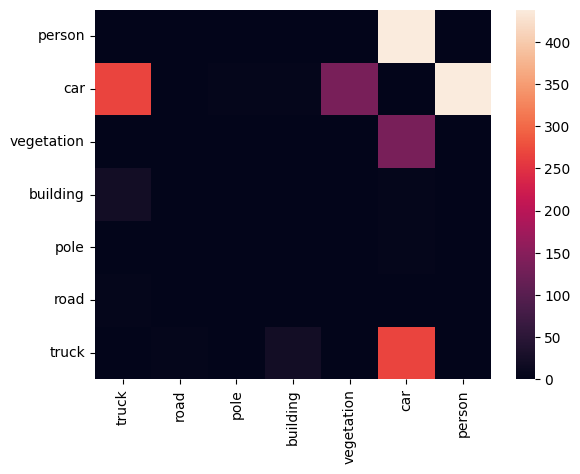

In [185]:
gen_heatmap(3, normalized=False, label='rider')

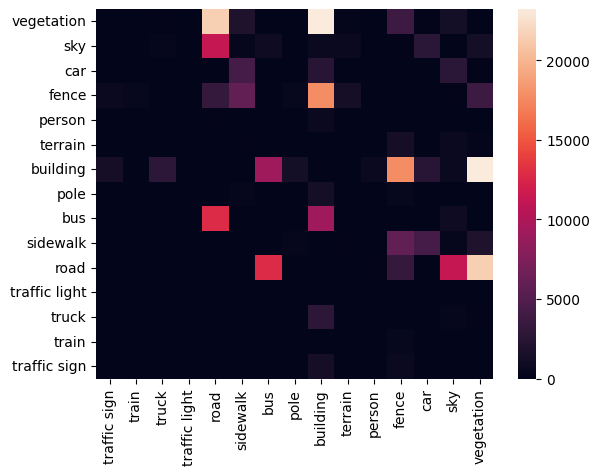

In [186]:
gen_heatmap(3, normalized=False, label='wall')

In [187]:
gen_heatmap(3, normalized=False, label='train')

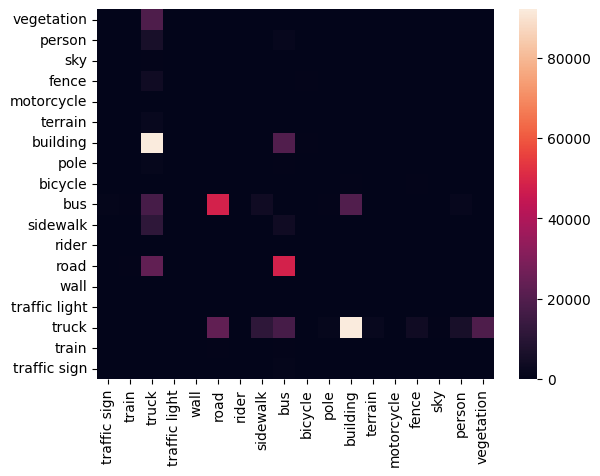

In [188]:
gen_heatmap(3, normalized=False, label='car')

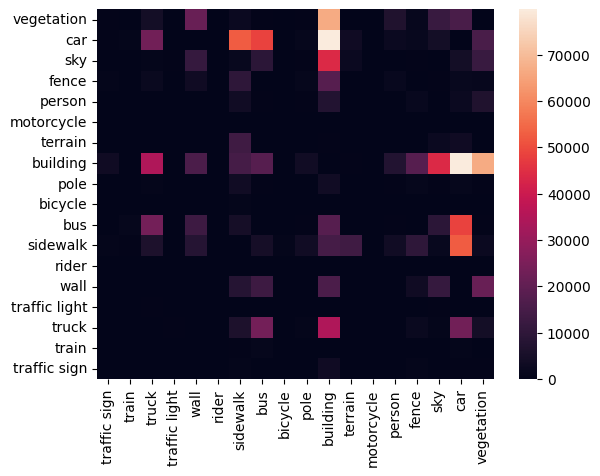

In [189]:
gen_heatmap(3, normalized=False, label='road')

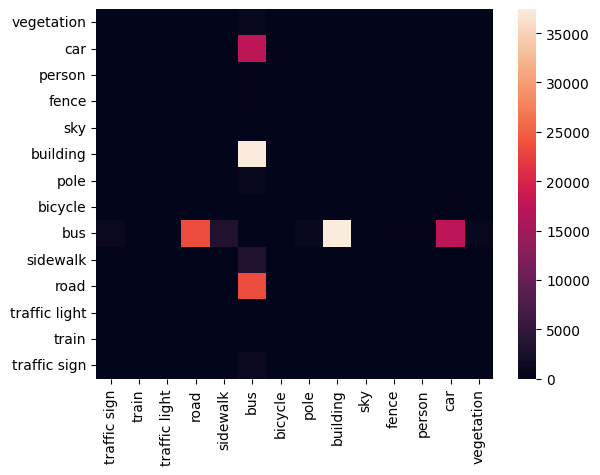

In [190]:
gen_heatmap(3, normalized=False, label='truck')

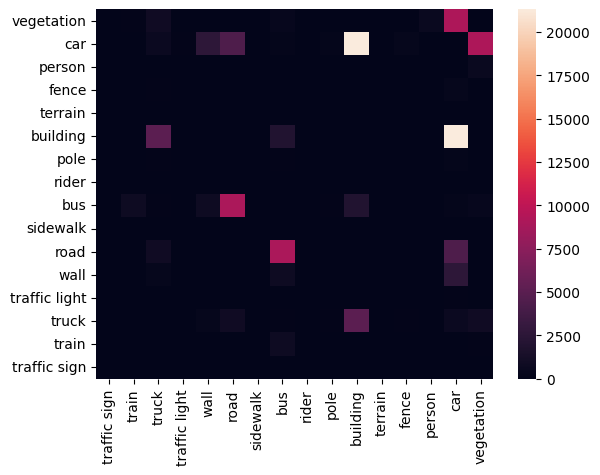

In [191]:
gen_heatmap(3, normalized=False, label='sky')

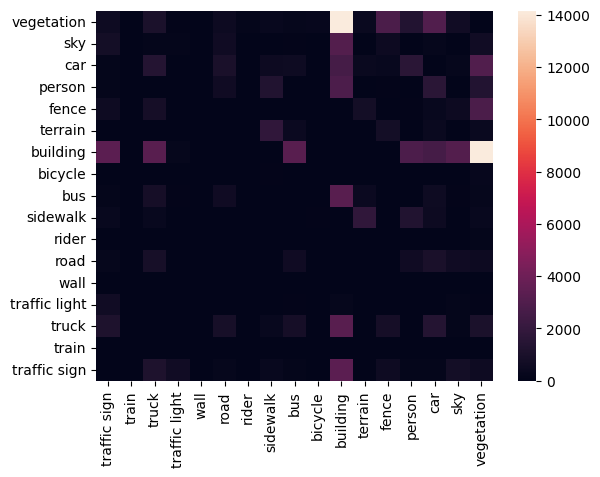

In [192]:
gen_heatmap(3, normalized=False, label='pole')

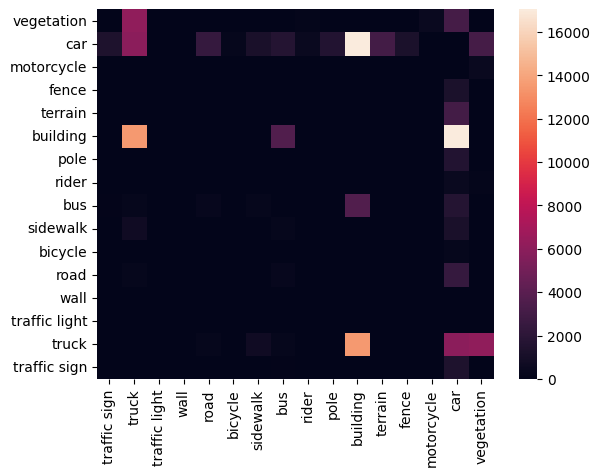

In [193]:
gen_heatmap(3, normalized=False, label='person')

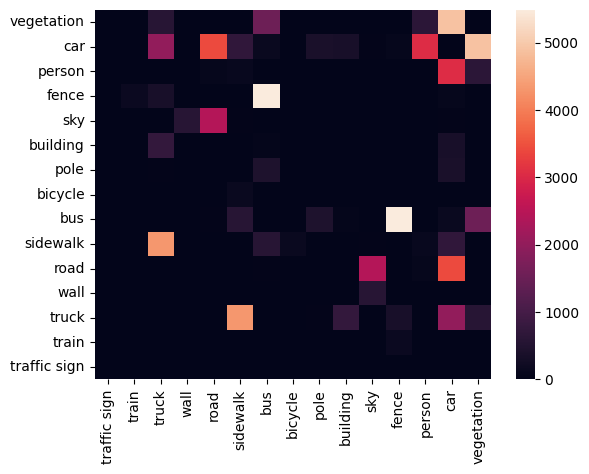

In [194]:

gen_heatmap(3, normalized=False, label='terrain')

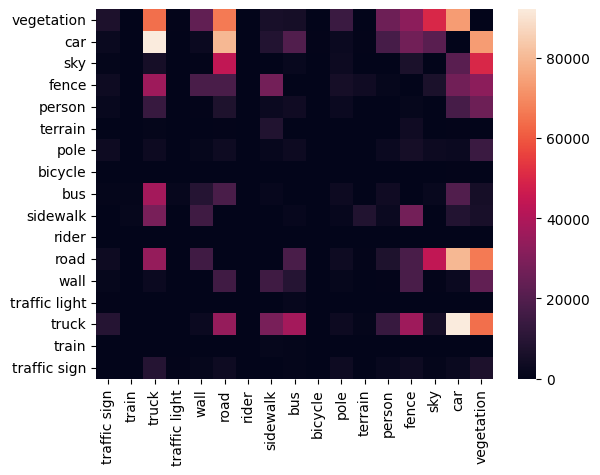

In [195]:
gen_heatmap(3, normalized=False, label='building')

In [196]:
gen_heatmap(3, normalized=False, label='bicycle')

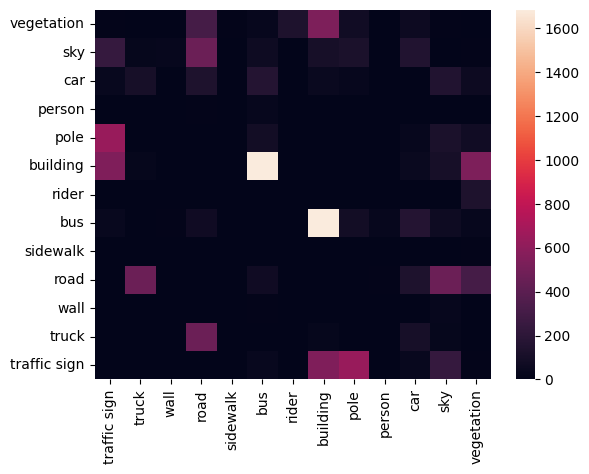

In [197]:
gen_heatmap(3, normalized=False, label='traffic light')

In [241]:
pc_certified_dict = pickle.load(open('/BS/mlcysec/work/robust-segmentation/code/hrnet_seg/tblogs1024/cached_stats/percentage_certified_11.pkl', 'rb'))
m_pc = np.array(list(pc_certified_dict.values())).mean(0)
for i in range(len(m_pc)):
    print(f"At set size: {i+1} percentage certified pixels = {np.round(m_pc[i]*100, 2)}% ")

At set size: 1 percentage certified pixels = 79.83% 
At set size: 2 percentage certified pixels = 94.45% 
At set size: 3 percentage certified pixels = 98.97% 
